In [1]:
from problematic import Indexer, Projector
from problematic import serialED

import matplotlib.pyplot as plt 
plt.rcParams["image.cmap"]  = "viridis"

In [2]:
ed = serialED.load("zeolite_a/data/subdata/image_*.h5")

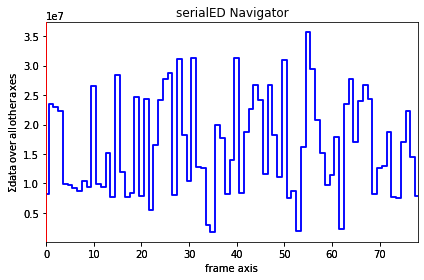

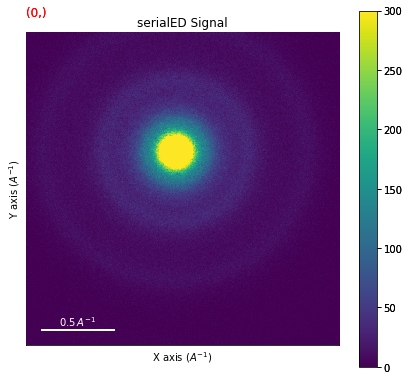

In [3]:
ed.plot(vmax=300)

In [4]:
ed.data.shape

(79, 516, 516)

In [5]:
sigma = 10
centers = ed.get_direct_beam_position(sigma=sigma)

In [6]:
footprint = 19
processed = ed.remove_background(footprint = footprint)

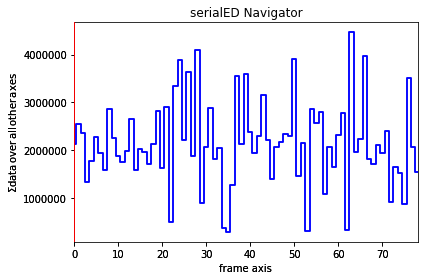

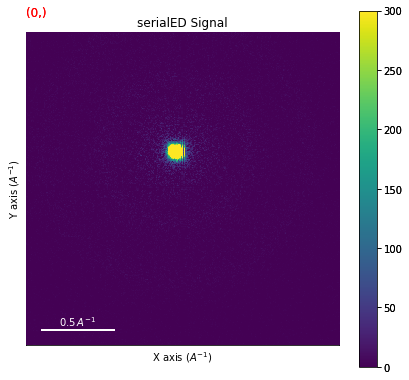

In [10]:
processed.plot(vmax = 300)

In [11]:
azimuth = -6.61
amplitude = 2.43
processed = processed.apply_stretch_correction(azimuth=azimuth, amplitude=amplitude, centers=centers)

Dropdown(description='Method', options=('find_peaks_regionprops',), value='find_peaks_regionprops')

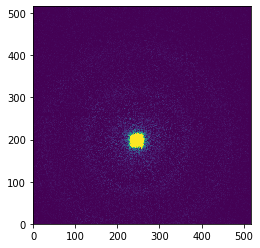

In [12]:
processed.find_peaks_interactive(imshow_kwargs={"vmax":100})

In [13]:
min_sigma=4
max_sigma=5
threshold=1
min_size=50
processed = processed.find_peaks_and_clean_images(min_sigma= min_sigma, max_sigma= max_sigma, threshold=threshold, min_size=min_size)

In [14]:
processed.save("processed.hdf5")

In [15]:
processed = serialED.load("processed.hdf5")
centers = processed._centers 

In [16]:
name = "LTA"
spgr = "Fm-3c"
params = (24.6100,)
dmin, dmax = 1.0, 10.0
thickness = 400

projector = Projector.from_parameters(params, spgr = spgr, name = name, dmin=dmin, dmax=dmax, thickness=thickness)

FileNotFoundError: [Errno 2] No such file or directory: 'sginfo': 'sginfo'